<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-395/477 Redes Neuronales Artificiales I-2019 </h1>

<H3 align='center'> Tarea 1 - Redes Neuronales y *Deep Learning* </H3>
<hr style="height:2px;border:none"/>

## Pregunta 3

#### Carga Inicial de Datos

Se realiza la carga inicial de los datos utilizando el código proveido en el enunciado.

In [2]:
import numpy as np
import keras
import seaborn as sn
import matplotlib.pyplot as plt
import random as rand
from keras.datasets import cifar10
from keras.optimizers import SGD, rmsprop
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.layers import Input
from sklearn.metrics import f1_score
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot,plot_model
from skimage.measure import compare_ssim as ssim
import keras.backend as K
K.set_image_dim_ordering('tf')

def mse(imageA, imageB):

    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])

    return err

def randomSampler(data, y):
    marks = np.zeros(data.shape[0], dtype = bool)
    for i in range(int(data.shape[0]*0.1)):
        candidate = rand.randint(0, data.shape[0] - 1)
        while(marks[candidate]):
            candidate = rand.randint(0, data.shape[0] - 1)
        marks[candidate] = True
    not_marks = np.invert(marks)
    return data[not_marks], y[not_marks], data[marks], y[marks]     

label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']  
 
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, y_train, x_val, y_val = randomSampler(x_train, y_train)


Using TensorFlow backend.


#### a) Visualización

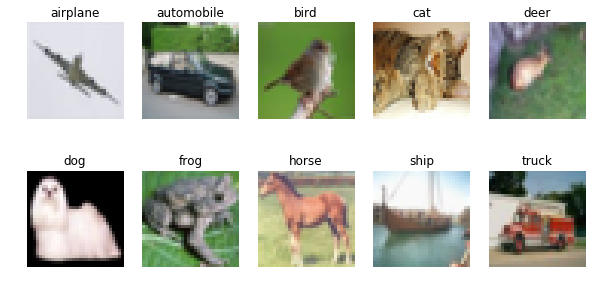

In [3]:
idx_dato = [np.random.choice(np.where(y_train==i)[0]) for i in range(10)] #sample from each class
f,axx = plt.subplots(2,5,figsize=(10,5))
for i, dato in enumerate(idx_dato):
    axx[int(i/5),i%5].imshow(x_train[dato])
    axx[int(i/5),i%5].axis('off')
    axx[int(i/5),i%5].set_title(label_names[i])
plt.show()

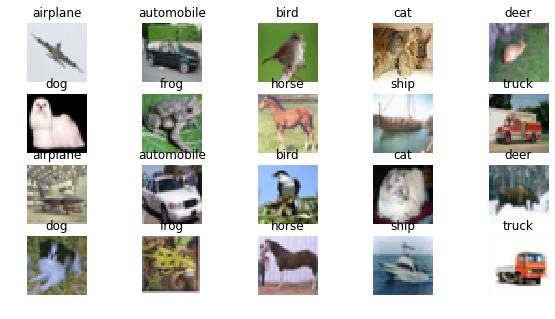

In [8]:
image_matrix = [idx_dato, [np.random.choice(np.where(y_train==i)[0]) for i in range(10)]]
ssim_matrix = np.zeros((10,10))
mse_matrix = np.zeros((10,10))

for i in range(10):
    for j in range(10):
        ssim_val = ssim(x_train[image_matrix[0][i]], x_train[image_matrix[1][j]], multichannel = True)
        mse_val = mse(x_train[image_matrix[0][i]], x_train[image_matrix[1][j]])
        ssim_matrix[i][j] = ssim_val
        ssim_matrix[j][i] = ssim_val
        mse_matrix[i][j] = mse_val
        mse_matrix[j][i] = mse_val
        
f,axx = plt.subplots(4,5,figsize=(10,5))
offset = 0
for row in image_matrix:
    for i, dato in enumerate(row):
        axx[int(i/5) + offset,i%5].imshow(x_train[dato])
        axx[int(i/5) + offset,i%5].axis('off')
        axx[int(i/5) + offset,i%5].set_title(label_names[i])
    offset += 2
plt.show()

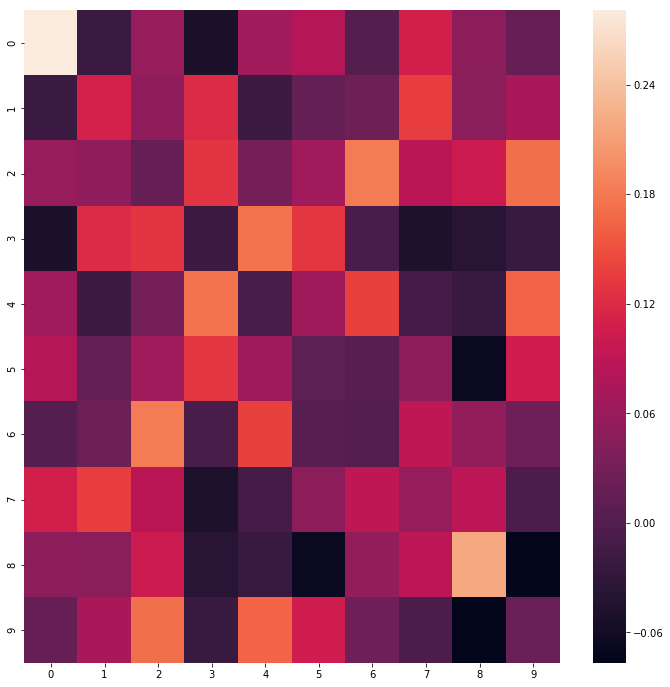

In [5]:
plt.subplots(figsize = (12,12))
sn.heatmap(ssim_matrix)

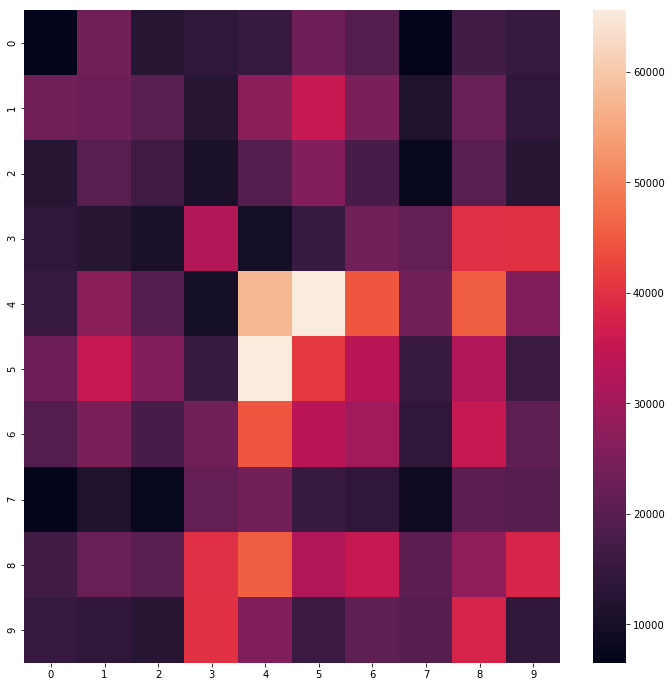

In [6]:
plt.subplots(figsize = (12,12))
sn.heatmap(mse_matrix)

Se realiza una comparación tanto cualitativa como cuantitativa de las imágenes de 32x32 pixeles en RGB scale, (32, 32, 3) la cual resulta en las siguientes conclusiones.

Cualitativa: A nivel de cualidad, es observable que las imágenes mas difíciles de distinguir entre sí son deer y horse, o igualmente car y truck y por último cat y dog, debido a que son físicamente idénticos, por lo tanto las características o features que se puedan distinguir entre ellos son muy similares.

Cuantitativamente: A nivel de composición numérica, realmente no existe correlación real entre las figuras, igualmente se intentó hacer un análisis estructural, sin embargo, debido a que los actores de las imágenes no están siempre en las mismas condiciones, y que la muestra es muy escaza, esto no se puede reflejar a través del cálculo de la similitud estructural.

#### b) Output

In [7]:
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_val = keras.utils.to_categorical(y_val, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)
Xnorm_train = x_train.astype('float32')/255
Xnorm_val = x_val.astype('float32')/255
Xnorm_test = x_test.astype('float32')/255

#### c) Representation

In [8]:
model_sgd = Sequential()
model_sgd.add(Conv2D(32, (3, 3), padding='same', input_shape=Xnorm_train.shape[1:],activation='relu'))
model_sgd.add(MaxPooling2D(pool_size=(2, 2)))
model_sgd.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
model_sgd.add(MaxPooling2D(pool_size=(2, 2)))
model_sgd.add(Flatten())
model_sgd.add(Dense(512,activation='relu'))
model_sgd.add(Dense(10,activation='softmax'))
model_sgd.summary()

model_rms = Sequential()
model_rms.add(Conv2D(32, (3, 3), padding='same', input_shape=Xnorm_train.shape[1:],activation='relu'))
model_rms.add(MaxPooling2D(pool_size=(2, 2)))
model_rms.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
model_rms.add(MaxPooling2D(pool_size=(2, 2)))
model_rms.add(Flatten())
model_rms.add(Dense(512,activation='relu'))
model_rms.add(Dense(10,activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               2097664   
_________________________________________________________________
dens

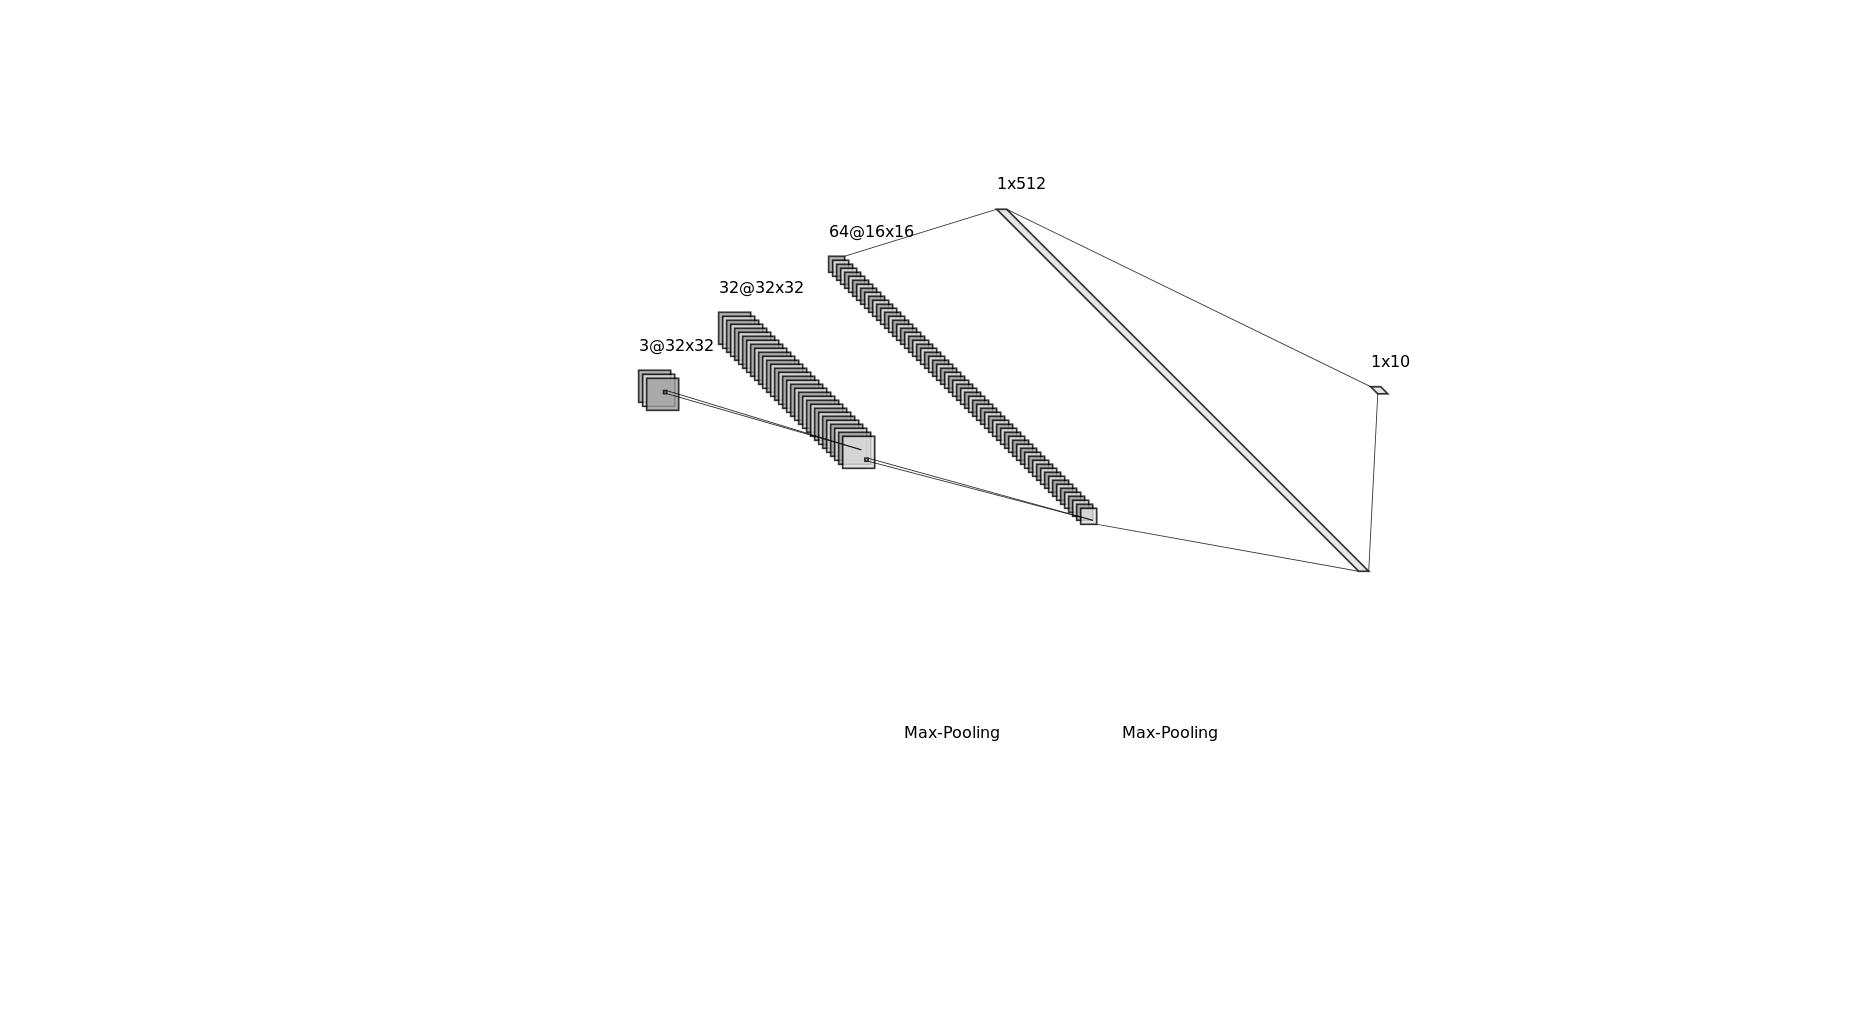

#### d) RMS vs SGD

In [9]:
opt_sgd = SGD(lr=1e-4,decay=1e-6)
model_sgd.compile(optimizer = opt_sgd, loss = "categorical_crossentropy")
hist_sgd = model_sgd.fit(Xnorm_train, y_train,epochs=25, validation_data=(Xnorm_val,y_val))
opt_rms = rmsprop(lr=1e-4, decay=1e-6)
model_rms.compile(optimizer = opt_rms, loss = "categorical_crossentropy")
hist_rms = model_rms.fit(Xnorm_train, y_train,epochs=25, validation_data=(Xnorm_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 45000 samples, validate on 5000 samples
Epoch 1/25
45000/45000 [==============================] - 28s 618us/step - loss: 2.3050 - val_loss: 2.2990
Epoch 2/25
45000/45000 [==============================] - 9s 203us/step - loss: 2.2947 - val_loss: 2.2892
Epoch 3/25
45000/45000 [==============================] - 9s 202us/step - loss: 2.2856 - val_loss: 2.2800
Epoch 4/25
45000/45000 [==============================] - 10s 213us/step - loss: 2.2766 - val_loss: 2.2706
Epoch 5/25
45000/45000 [==============================] - 10s 226us/step - loss: 2.2671 - val_loss: 2.2605
Epoch 6/25
45000/45000 [==============================] - 9s 211us/step - loss: 2.2568 - val_loss: 2.2497
Epoch 7/25
45000/45000 [==============================] - 9s 206us/step - loss: 2.2456 - val_loss: 2.2377
Epoch 8/25
45000/45000 [==============================] - 9s 208us/step - loss: 2.2330 - val_loss: 2.2241
Epoch 9/25
45000/45000 [============================

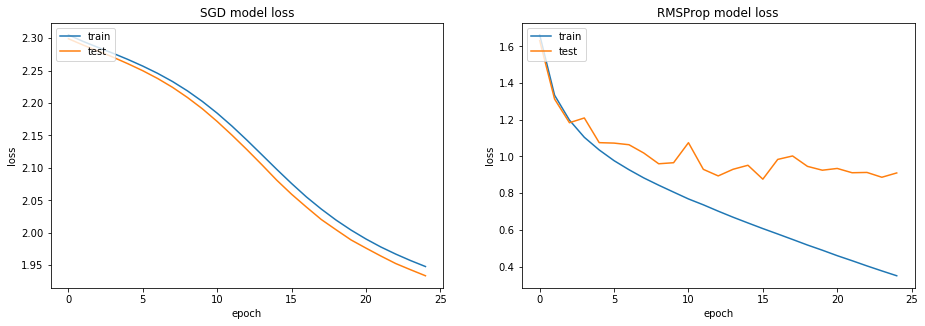

In [10]:
plt.figure(1)

plt.subplot(121)
plt.plot(hist_sgd.history['loss'])
plt.plot(hist_sgd.history['val_loss'])
plt.title('SGD model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(122)
plt.plot(hist_rms.history['loss'])
plt.plot(hist_rms.history['val_loss'])
plt.title('RMSProp model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplots_adjust(top=1, bottom=0.08, left=0, right=2, hspace=0.25,
                    wspace=0.2)

RMSProp obtiene resultados bastante mejores que SGD, sin embargo cae en overfitting. Ninguno de los dos modelos tiene realmente un buen desempeño sin embargo, ambos por debajo del 70%

#### e) Modificación

In [13]:
model_flat = Sequential()
model_flat.add(Conv2D(32, (3, 3), padding='same', input_shape=Xnorm_train.shape[1:],activation='relu'))
model_flat.add(MaxPooling2D(pool_size=(2, 2)))
model_flat.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
model_flat.add(MaxPooling2D(pool_size=(2, 2)))
model_flat.add(Flatten())
model_flat.add(Dense(512,activation='relu'))
model_flat.add(Dense(10,activation='softmax'))
print("Model Flat")
model_flat.summary()

model_deep = Sequential()
model_deep.add(Conv2D(32, (3, 3), padding='same', input_shape=Xnorm_train.shape[1:],activation='relu'))
model_deep.add(MaxPooling2D(pool_size=(2, 2)))
model_deep.add(Conv2D(128, (3, 3), padding='same',activation='relu'))
model_deep.add(MaxPooling2D(pool_size=(2, 2)))
model_deep.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
model_deep.add(MaxPooling2D(pool_size=(2, 2)))
model_deep.add(Flatten())
model_deep.add(Dense(512,activation='relu'))
model_deep.add(Dense(10,activation='softmax'))
print("\nModel Deep")
model_deep.summary()

Model Flat
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 512)               2097664   
_________________________________________________________________
dense_14 (Dense)             (None, 10)                5130      

In [14]:
model_flat.compile(optimizer = opt_rms, loss = "categorical_crossentropy")
hist_flat = model_flat.fit(Xnorm_train, y_train,epochs=25, validation_data=(Xnorm_val,y_val))
model_deep.compile(optimizer = opt_rms, loss = "categorical_crossentropy")
hist_deep = model_deep.fit(Xnorm_train, y_train,epochs=25, validation_data=(Xnorm_val,y_val))

Train on 45000 samples, validate on 5000 samples
Epoch 1/25
45000/45000 [==============================] - 13s 286us/step - loss: 1.6802 - val_loss: 1.5051
Epoch 2/25
45000/45000 [==============================] - 12s 265us/step - loss: 1.3618 - val_loss: 1.3424
Epoch 3/25
45000/45000 [==============================] - 12s 266us/step - loss: 1.2197 - val_loss: 1.2807
Epoch 4/25
45000/45000 [==============================] - 12s 266us/step - loss: 1.1243 - val_loss: 1.1884
Epoch 5/25
45000/45000 [==============================] - 12s 266us/step - loss: 1.0479 - val_loss: 1.1410
Epoch 6/25
45000/45000 [==============================] - 12s 265us/step - loss: 0.9884 - val_loss: 1.1127
Epoch 7/25
45000/45000 [==============================] - 12s 262us/step - loss: 0.9394 - val_loss: 1.0404
Epoch 8/25
45000/45000 [==============================] - 12s 264us/step - loss: 0.8933 - val_loss: 1.0712
Epoch 9/25
45000/45000 [==============================] - 13s 293us/step - loss: 0.8535 - val_l

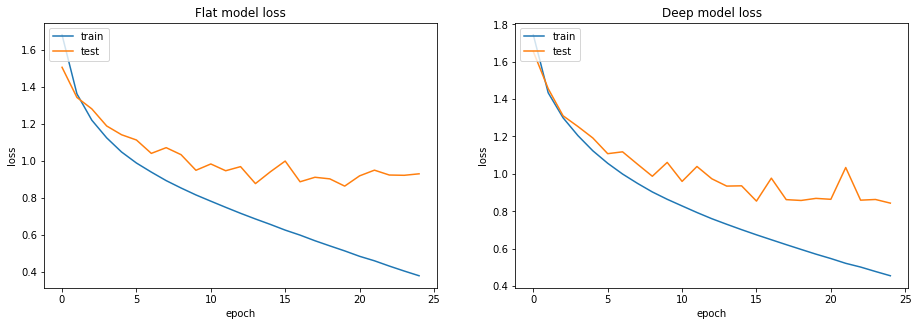

In [15]:
plt.figure(1)

plt.subplot(121)
plt.plot(hist_flat.history['loss'])
plt.plot(hist_flat.history['val_loss'])
plt.title('Flat model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(122)
plt.plot(hist_deep.history['loss'])
plt.plot(hist_deep.history['val_loss'])
plt.title('Deep model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplots_adjust(top=1, bottom=0.08, left=0, right=2, hspace=0.25,
                    wspace=0.2)

Las modificaciones consistieron básicamente en agregar o quitar capas convolucionales, sin lograr realmente un mucho mejor resultado. Como se vio en las presentaciones de esta pregunta, la mejor alternativa consistía en agregar batch normalization y dropouts, sin embargo no se alcanzó a experimentar.

#### f y g) Aumento de cantidad de filtros y tamaño de filtros en la primera capa

In [16]:
model_2rms = Sequential()
model_2rms.add(Conv2D(64, (3, 3), padding='same', input_shape=Xnorm_train.shape[1:],activation='relu'))
model_2rms.add(MaxPooling2D(pool_size=(2, 2)))
model_2rms.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
model_2rms.add(MaxPooling2D(pool_size=(2, 2)))
model_2rms.add(Flatten())
model_2rms.add(Dense(512,activation='relu'))
model_2rms.add(Dense(10,activation='softmax'))

In [17]:
model_2rms.compile(optimizer = opt_rms, loss = "categorical_crossentropy")
hist_2rms = model_2rms.fit(Xnorm_train, y_train,epochs=25, validation_data=(Xnorm_val, y_val))

Train on 45000 samples, validate on 5000 samples
Epoch 1/25
45000/45000 [==============================] - 29s 643us/step - loss: 1.6721 - val_loss: 1.6047
Epoch 2/25
45000/45000 [==============================] - 18s 394us/step - loss: 1.3369 - val_loss: 1.3793
Epoch 3/25
45000/45000 [==============================] - 18s 393us/step - loss: 1.1995 - val_loss: 1.2587
Epoch 4/25
45000/45000 [==============================] - 18s 393us/step - loss: 1.1086 - val_loss: 1.1911
Epoch 5/25
45000/45000 [==============================] - 18s 393us/step - loss: 1.0381 - val_loss: 1.0898
Epoch 6/25
45000/45000 [==============================] - 18s 402us/step - loss: 0.9790 - val_loss: 1.0904
Epoch 7/25
45000/45000 [==============================] - 18s 409us/step - loss: 0.9277 - val_loss: 1.0080
Epoch 8/25
45000/45000 [==============================] - 18s 389us/step - loss: 0.8818 - val_loss: 1.1132
Epoch 9/25
45000/45000 [==============================] - 17s 388us/step - loss: 0.8419 - val_l

In [20]:
model_22rms = Sequential()
model_22rms.add(Conv2D(32, (6, 6), padding='same', input_shape=Xnorm_train.shape[1:],activation='relu'))
model_22rms.add(MaxPooling2D(pool_size=(2, 2)))
model_22rms.add(Conv2D(64, (6, 6), padding='same',activation='relu'))
model_22rms.add(MaxPooling2D(pool_size=(2, 2)))
model_22rms.add(Flatten())
model_22rms.add(Dense(512,activation='relu'))
model_22rms.add(Dense(10,activation='softmax'))

In [21]:
model_22rms.compile(optimizer = opt_rms, loss = "categorical_crossentropy")
hist_22rms = model_22rms.fit(Xnorm_train, y_train,epochs=25, validation_data=(Xnorm_val, y_val))

Train on 45000 samples, validate on 5000 samples
Epoch 1/25
45000/45000 [==============================] - 21s 472us/step - loss: 1.6659 - val_loss: 1.5915
Epoch 2/25
45000/45000 [==============================] - 20s 452us/step - loss: 1.3591 - val_loss: 1.3743
Epoch 3/25
45000/45000 [==============================] - 20s 440us/step - loss: 1.2122 - val_loss: 1.2045
Epoch 4/25
45000/45000 [==============================] - 20s 442us/step - loss: 1.1092 - val_loss: 1.2496
Epoch 5/25
45000/45000 [==============================] - 21s 462us/step - loss: 1.0297 - val_loss: 1.0747
Epoch 6/25
45000/45000 [==============================] - 20s 449us/step - loss: 0.9630 - val_loss: 1.0295
Epoch 7/25
45000/45000 [==============================] - 20s 441us/step - loss: 0.9063 - val_loss: 0.9914
Epoch 8/25
45000/45000 [==============================] - 20s 446us/step - loss: 0.8551 - val_loss: 1.0397
Epoch 9/25
45000/45000 [==============================] - 20s 455us/step - loss: 0.8083 - val_l

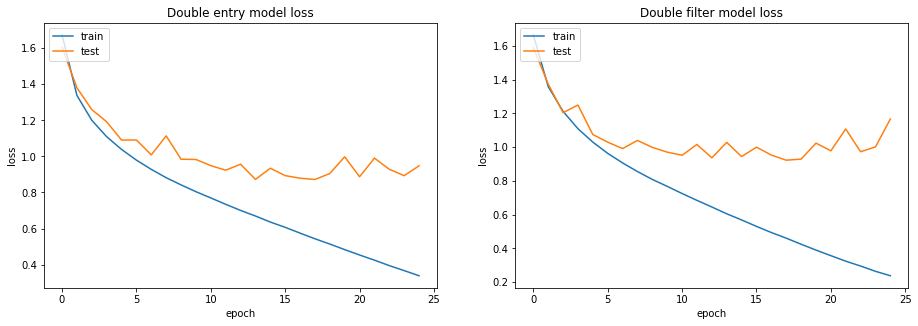

In [23]:
plt.figure(1)

plt.subplot(121)
plt.plot(hist_2rms.history['loss'])
plt.plot(hist_2rms.history['val_loss'])
plt.title('Double entry model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(122)
plt.plot(hist_22rms.history['loss'])
plt.plot(hist_22rms.history['val_loss'])
plt.title('Double filter model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplots_adjust(top=1, bottom=0.08, left=0, right=2, hspace=0.25,
                    wspace=0.2)

Al aumentar el tamaño del filtro se llega a un mejor valor óptimo de la loss en el entrenamiento, sin embargo no se logra mitigar el overfitting. En cuanto a aumentar la cantidad de filtros en la primera capa convolucional no generó cambios significativos.

#### h) Single vs Double

In [24]:
nmodel = Sequential()
nmodel.add(Conv2D(32, (3, 3), padding='same', input_shape=Xnorm_train.shape[1:]))
nmodel.add(Activation('relu'))
nmodel.add(Conv2D(64, (3, 3), padding='same'))
nmodel.add(Activation('relu'))
nmodel.add(MaxPooling2D(pool_size=(2, 2)))
nmodel.add(Conv2D(32, (3, 3), padding='same', input_shape=Xnorm_train.shape[1:]))
nmodel.add(Activation('relu'))
nmodel.add(Conv2D(64, (3, 3), padding='same'))
nmodel.add(Activation('relu'))
nmodel.add(MaxPooling2D(pool_size=(2, 2)))
nmodel.add(Flatten())
nmodel.add(Dense(512,activation='relu'))
nmodel.add(Dense(10,activation='softmax'))
nmodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 16, 16, 32)        18464     
_________________________________________________________________
activation_3 (Activation)    (None, 16, 16, 32)        0         
__________

In [25]:
nmodel.compile(optimizer = opt_rms, loss = "categorical_crossentropy")
nhist = nmodel.fit(Xnorm_train, y_train,epochs=25, validation_data=(Xnorm_val,y_val))

Train on 45000 samples, validate on 5000 samples
Epoch 1/25
45000/45000 [==============================] - 24s 535us/step - loss: 1.6770 - val_loss: 1.5509
Epoch 2/25
45000/45000 [==============================] - 23s 506us/step - loss: 1.3509 - val_loss: 1.3935
Epoch 3/25
45000/45000 [==============================] - 23s 511us/step - loss: 1.1860 - val_loss: 1.1525
Epoch 4/25
45000/45000 [==============================] - 23s 519us/step - loss: 1.0649 - val_loss: 1.0642
Epoch 5/25
45000/45000 [==============================] - 23s 516us/step - loss: 0.9708 - val_loss: 1.0491
Epoch 6/25
45000/45000 [==============================] - 23s 516us/step - loss: 0.8956 - val_loss: 0.9892
Epoch 7/25
45000/45000 [==============================] - 23s 516us/step - loss: 0.8355 - val_loss: 0.9346
Epoch 8/25
45000/45000 [==============================] - 23s 514us/step - loss: 0.7807 - val_loss: 0.9425
Epoch 9/25
45000/45000 [==============================] - 23s 515us/step - loss: 0.7288 - val_l

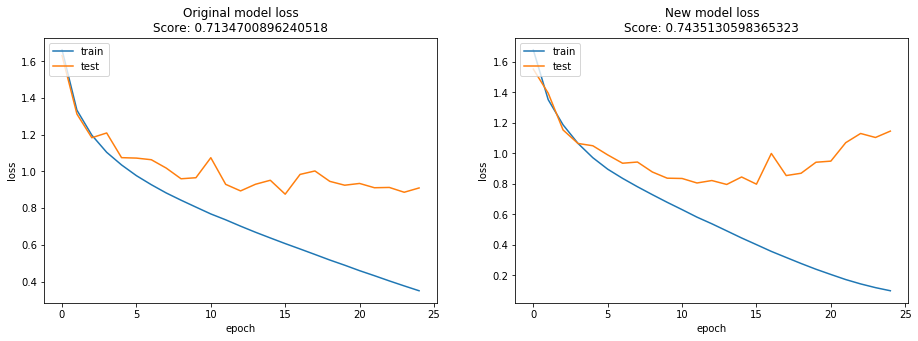

In [30]:
rms_score = f1_score(y_test,model_rms.predict_classes(Xnorm_test),average='weighted')
nrms_score = f1_score(y_test,nmodel.predict_classes(Xnorm_test),average='weighted')

plt.figure(1)

plt.subplot(121)
plt.plot(hist_rms.history['loss'])
plt.plot(hist_rms.history['val_loss'])
plt.title(f'Original model loss\nScore: {rms_score}')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(122)
plt.plot(nhist.history['loss'])
plt.plot(nhist.history['val_loss'])
plt.title(f'New model loss\nScore: {nrms_score}')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplots_adjust(top=1, bottom=0.08, left=0, right=2, hspace=0.25,
                    wspace=0.2)

A nivel de score F1 se logra mejor resultados con la arquitectura mas profunda, pero se nota en la gráfica como el overfitting igualemnte va aumentando, y que en realidad la mejora sólo se obtuvo por llegar a un mejor resultado del valor de la loss. Además el entrenamiento de esta arquitectura con mas capas fue de un poco mas del el doble de tiempo que la otra arquitectura, y la mejora fue de 3%. No se alcanzó a agregar y testear regulizadores.